In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import segyio

In [ ]:
# credit to @alessandro-adm for the colormaps.py script
from colormaps import cmap_yrwbc, cmap_sharp, odt_seismics, odt_petrel

### Load seismic

I take inline 1300 of the 3D Penobscot open dataset

In [12]:
# from https://github.com/equinor/segyio-notebooks/blob/master/notebooks/basic/02_segy_quicklook.ipynb

filename = 'data/1300.sgy'

with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    # Load headers
    bin_headers = f.bin
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'

'N Traces: 481, N Samples: 1001, Sample rate: 4.0ms'

In order to scale and standardize the display, it is useful to get the nth percentile of the amplitudes

In [3]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 3909; the max amplitude is 30167'

### Plotting 
Plot of 4 different cmaps

Text(0.5, 1.0, 'odt_petrel')

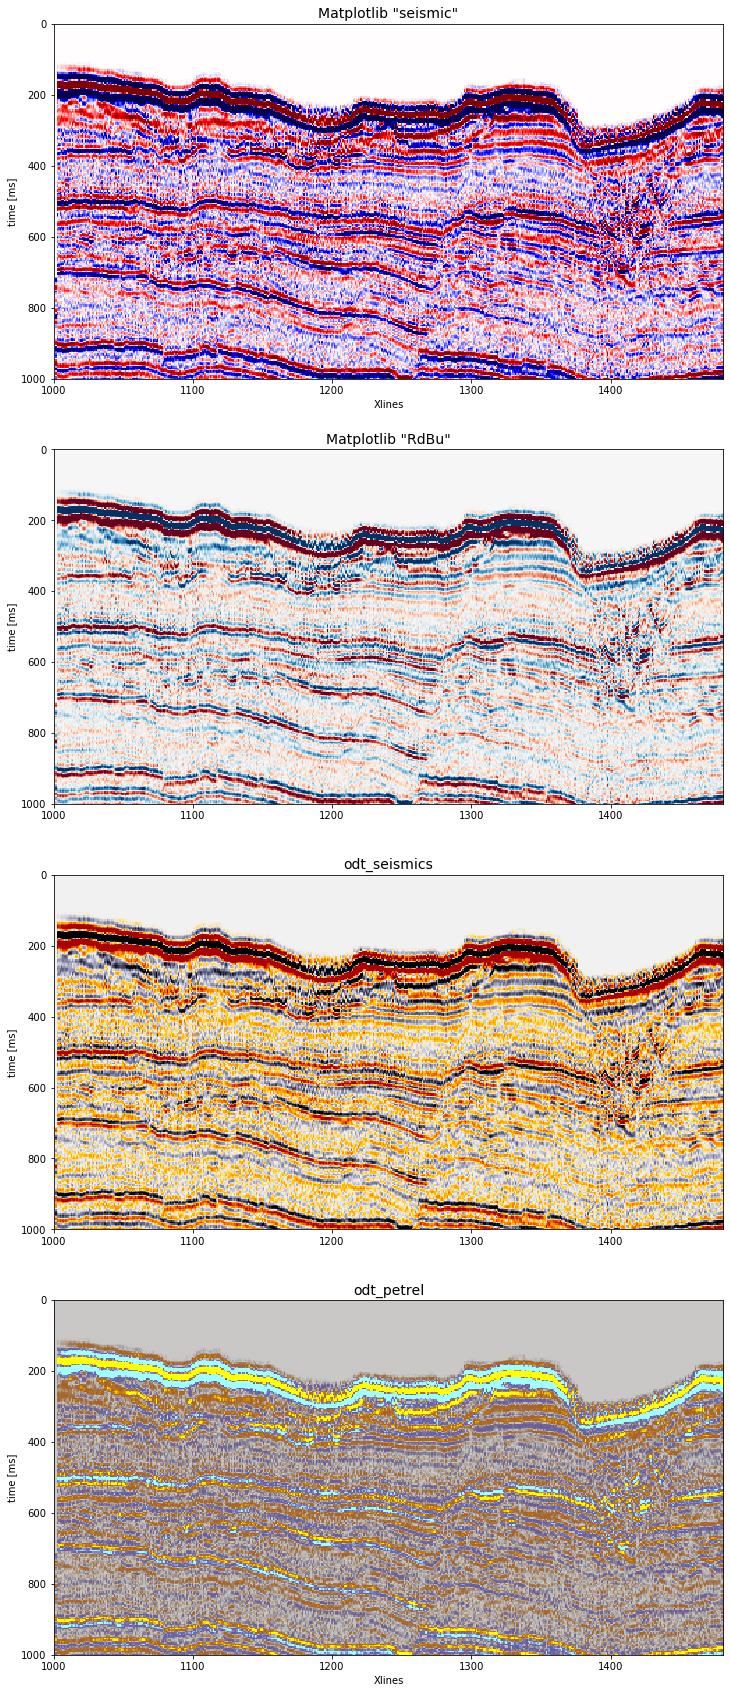

In [13]:
gx1 = np.transpose(data[:,:250])
fig, axs = plt.subplots(4, 1, figsize=(12, 30))
extent = [1000, 1481, len(gx1)*4, 0]

axs[0].imshow(gx1,
              aspect='auto',
              cmap='seismic', 
              vmin=-vm, vmax=vm,
              extent=extent
              )
axs[0].set( ylabel='time [ms]', xlabel='Xlines')
axs[0].set_title('Matplotlib "seismic"', fontsize=14)

 
axs[1].imshow(gx1,
              aspect='auto',
              cmap='RdBu', 
              vmin=-vm, vmax=vm,
              extent=extent
              )
axs[1].set( ylabel='time [ms]')
axs[1].set_title('Matplotlib "RdBu"', fontsize=14)


axs[2].imshow(gx1,
              aspect='auto',
              cmap=odt_seismics, 
              vmin=-vm, vmax=vm,
              extent=extent
              )
axs[2].set( ylabel='time [ms]')
axs[2].set_title('odt_seismics', fontsize=14)


axs[3].imshow(gx1,
              aspect='auto',
              cmap=odt_petrel, 
              vmin=-vm, vmax=vm,
              extent=extent
              )
axs[3].set( ylabel='time [ms]', xlabel='Xlines')
axs[3].set_title('odt_petrel', fontsize=14)